# Models - Linear_Regression ,Logistic_Regression 


1. IMPORTING IMPORTENT LIBRARIES' .

2. DATA ANALYSIS AND  DATA PREPROCESSING .

3. FEACTURE SELECTION- Using Cross_Validation and Learning_curve .

4. Model Accuracy .

# Import Libraries

In [7]:
# Importing the all the importent library's

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.linear_model as lmd
import seaborn as sns
sns.set()

In [8]:
# Getting the Data

data=pd.read_csv('D:/User/Desktop/M.L/ML data/car data.csv')
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATA ANALYSIS, DATA PREPROCESSING 

In [9]:
data['Car_Name']=data['Car_Name'].map(lambda name:name.split(' ')[0])#.value_counts()

In [10]:
d={1:['city','verna','jazz','Honda','eon','brio','grand','amaze','xcent','creta','elantra','Activa','Hero','i20','i10'],2:['Bajaj','KTM','TVS'],3:['omni','vitara','baleno','wagon','ritz','dzire','Suzuki','swift','ertiga','ciaz','sx4','alto'],4:['innova','land','corolla','etios','fortuner'],5:['Royal'],6:['Yamaha'],7:['Mahindra','s','UM','Hyosung','800','ignis','camry']}

In [11]:

for i in range(len(data['Car_Name'])):
    for j in range(1,len(d)+1):
        if data['Car_Name'][i] in d[j]:
            data['Car_Name'][i]=j
            
    

            
data['Car_Name']
#for d['Car_Name'][]

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0      3
1      3
2      3
3      3
4      3
      ..
296    1
297    1
298    1
299    1
300    1
Name: Car_Name, Length: 301, dtype: object

In [6]:
data['Car_Name'].value_counts()

1    135
4     49
3     48
2     37
5     17
6      8
7      7
Name: Car_Name, dtype: int64

In [7]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,3,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,3,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,1,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,1,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,1,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
for e in range(len(data['Year'])):
    data['Year'][e]=2020-data['Year'][e]

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,3,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,3,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,1,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,1,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,1,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
data.iloc[86]

Car_Name              4
Year                 10
Selling_Price        35
Present_Price      92.6
Kms_Driven        78000
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Name: 86, dtype: object

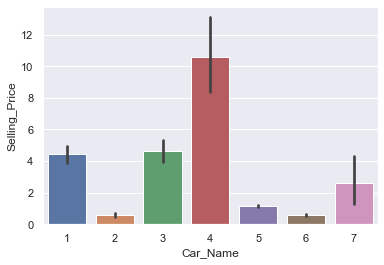

In [12]:
sns.barplot(x='Car_Name',y='Selling_Price',data=data)
# TOYATA COMPANY IS VERY EXPANCIVE

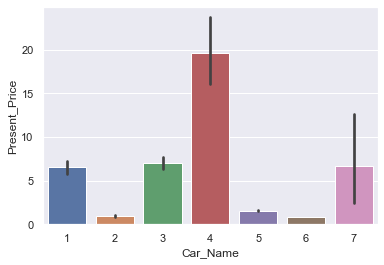

In [13]:
sns.barplot(x='Car_Name',y='Present_Price',data=data)


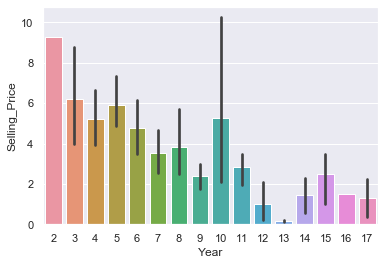

In [14]:
sns.barplot(x='Year',y='Selling_Price',data=data)

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


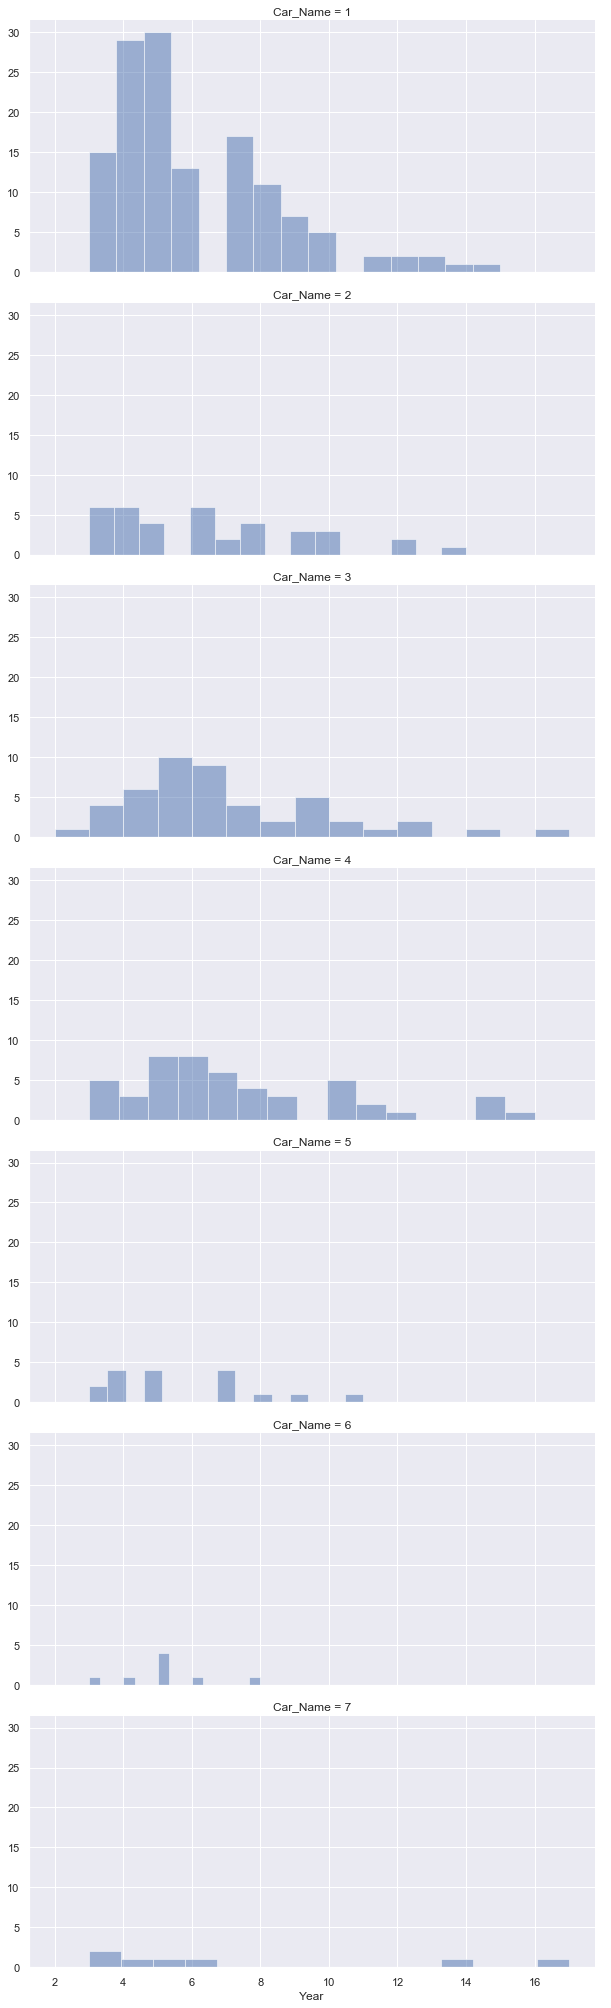

In [15]:
# THE BELLOW GRAPH SHOWS THE PRODUCTION RATES OF EACH COMPANY OVER YERAS

grid = sns.FacetGrid(data, row='Car_Name',size=4, aspect=2.1)
grid.map(plt.hist, 'Year', alpha=.5, bins=15)
grid.add_legend();

In [16]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,3,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,3,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,1,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,1,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,1,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,1,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


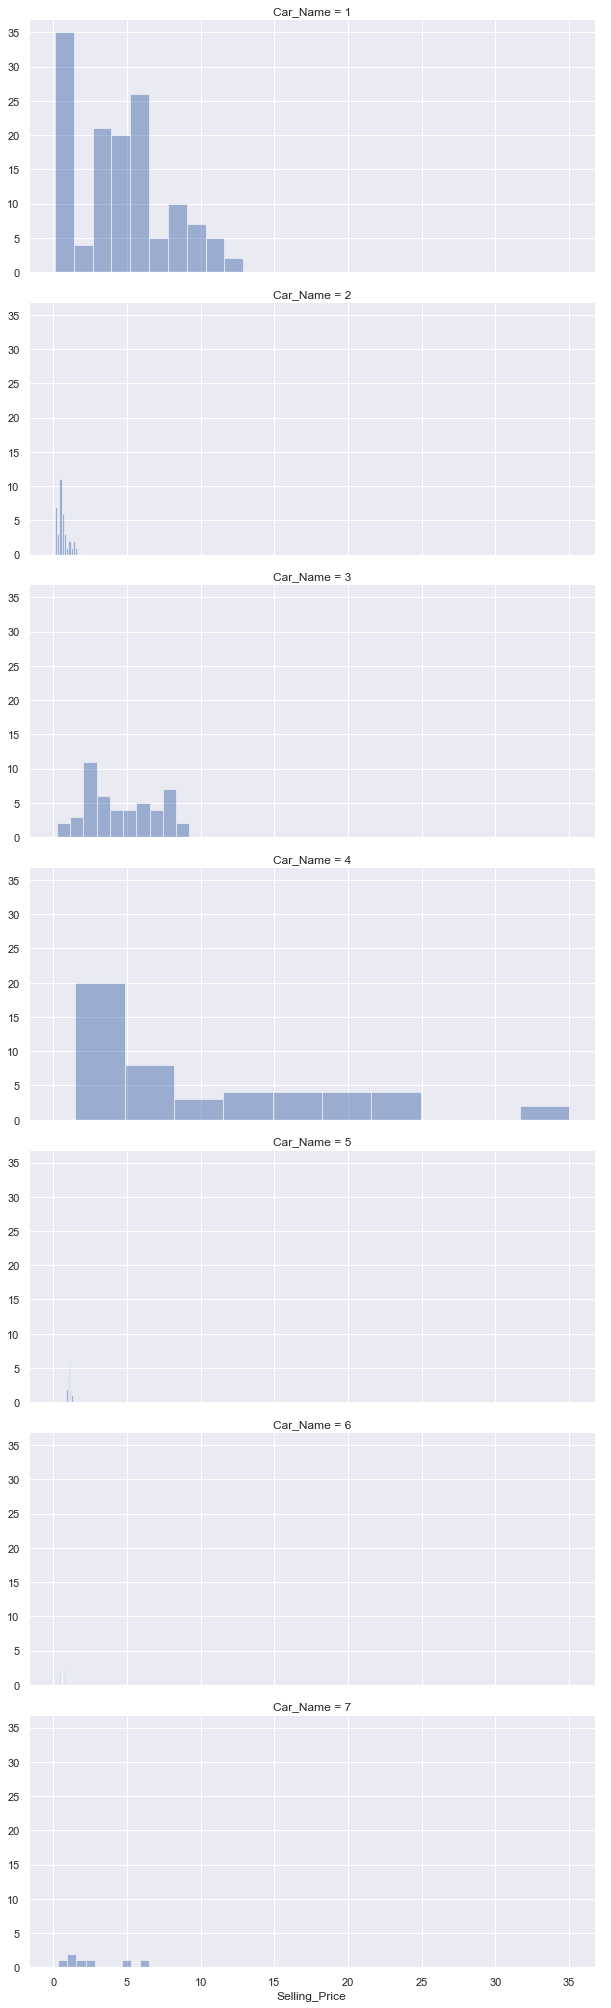

In [20]:
# THE BELLOW GRAPH SHOWS THE PRODUCTION RATES OF EACH COMPANY OVER YERAS

grid = sns.FacetGrid(data, row='Car_Name',size=4, aspect=2.1)
grid.map(plt.hist, 'Selling_Price', alpha=.5, bins=10)
grid.add_legend();

In [21]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,6.372093,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2.000000,0.100000,0.320000,500.000000,0.000000
25%,4.000000,0.900000,1.200000,15000.000000,0.000000
50%,6.000000,3.600000,6.400000,32000.000000,0.000000
75%,8.000000,6.000000,9.900000,48767.000000,0.000000
max,17.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
#

kmd=[]
for i in range(len(data['Kms_Driven'])):
    if data['Kms_Driven'][i]<=15000.0:
        kmd.append(1)
    elif data['Kms_Driven'][i]>15000.0 and data['Kms_Driven'][i]<=32000.0:
        
        kmd.append(2)
        
    elif data['Kms_Driven'][i]>32000.0 and data['Kms_Driven'][i]<=48767.0:
        kmd.append(3)
        
    elif data['Kms_Driven'][i]>48767.0:
        kmd.append(4)

In [13]:
data2=data

In [14]:
data2['Kms_Driven']=kmd

In [15]:
data2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,6,3.35,5.59,2,Petrol,Dealer,Manual,0
1,3,7,4.75,9.54,3,Diesel,Dealer,Manual,0
2,3,3,7.25,9.85,1,Petrol,Dealer,Manual,0
3,3,9,2.85,4.15,1,Petrol,Dealer,Manual,0
4,3,6,4.60,6.87,3,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,1,4,9.50,11.60,3,Diesel,Dealer,Manual,0
297,1,5,4.00,5.90,4,Petrol,Dealer,Manual,0
298,1,11,3.35,11.00,4,Petrol,Dealer,Manual,0
299,1,3,11.50,12.50,1,Diesel,Dealer,Manual,0


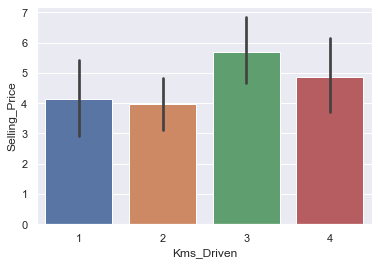

In [26]:
sns.barplot(x='Kms_Driven',y='Selling_Price',data=data2)


There's No strong 💪 correlation between selling price and the Kms_Driven .Since there is no proper trend

In [27]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,6,3.35,5.59,2,Petrol,Dealer,Manual,0
1,3,7,4.75,9.54,3,Diesel,Dealer,Manual,0
2,3,3,7.25,9.85,1,Petrol,Dealer,Manual,0
3,3,9,2.85,4.15,1,Petrol,Dealer,Manual,0
4,3,6,4.60,6.87,3,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,1,4,9.50,11.60,3,Diesel,Dealer,Manual,0
297,1,5,4.00,5.90,4,Petrol,Dealer,Manual,0
298,1,11,3.35,11.00,4,Petrol,Dealer,Manual,0
299,1,3,11.50,12.50,1,Diesel,Dealer,Manual,0


In [15]:

data['Seller_Type']=data['Seller_Type'].replace(to_replace=[',8'],value=['Dealer'] )
data['Seller_Type'].value_counts()

Dealer        196
Individual    105
Name: Seller_Type, dtype: int64

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


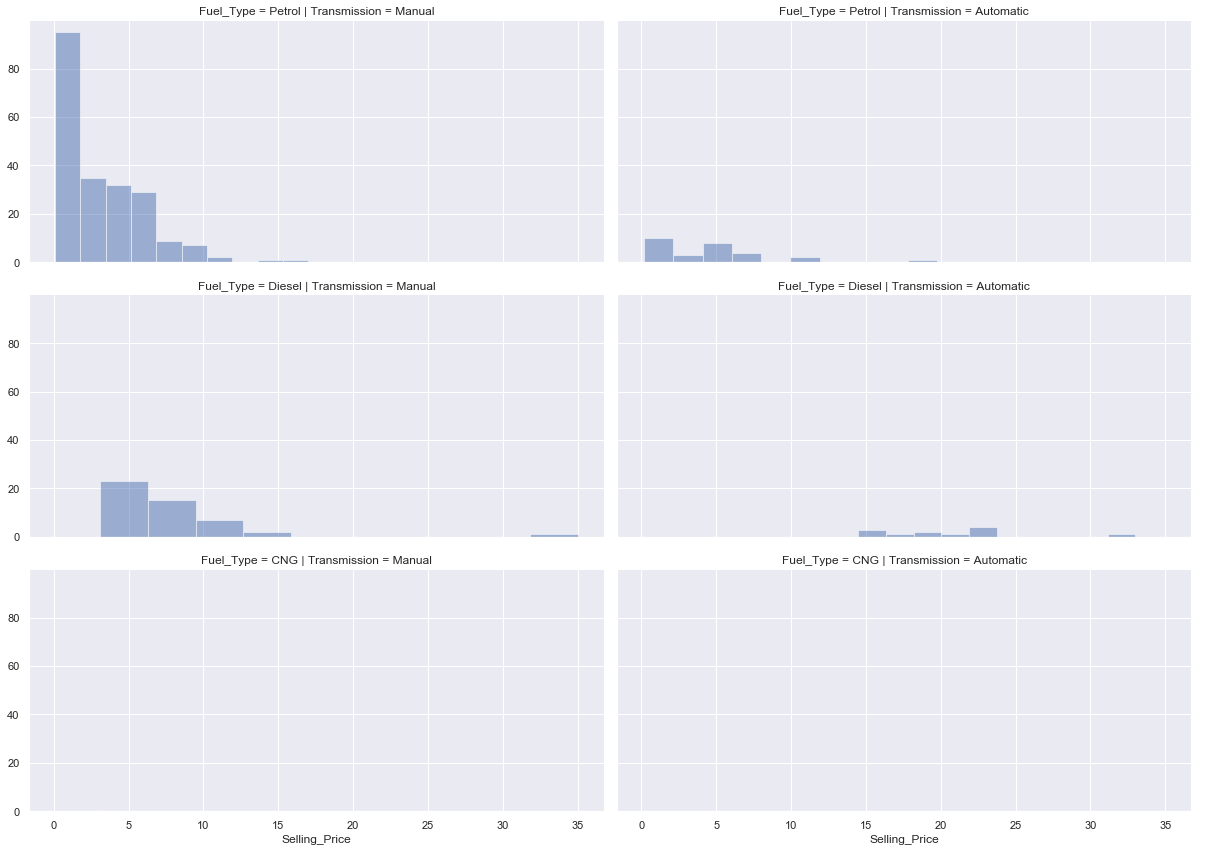

In [16]:
# THE BELLOW GRAPH SHOWS THE PRODUCTION RATES OF EACH COMPANY OVER YERAS

grid = sns.FacetGrid(data, row='Fuel_Type',col='Transmission',size=4, aspect=2.1)
grid.map(plt.hist, 'Selling_Price', alpha=.5, bins=10)
grid.add_legend();

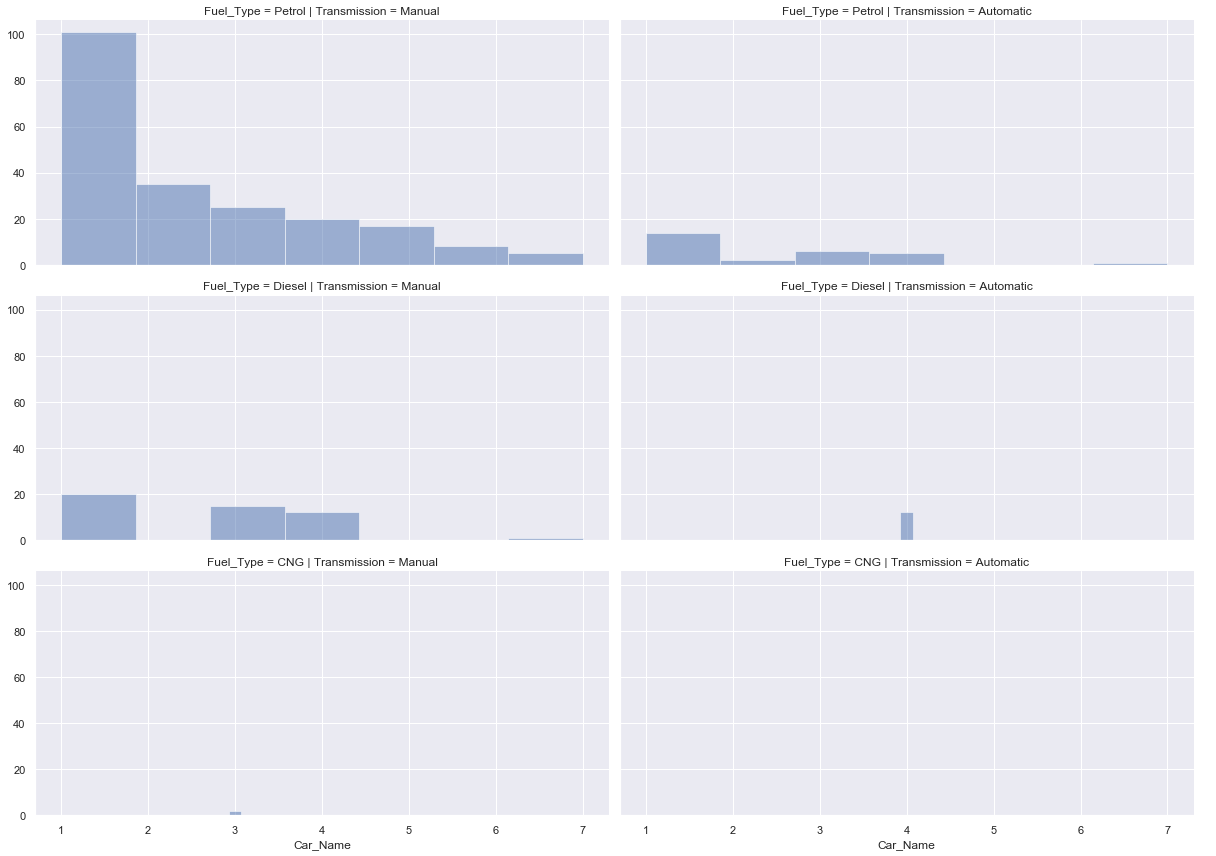

In [30]:
# THE BELLOW GRAPH SHOWS THE PRODUCTION RATES OF EACH COMPANY OVER YERAS

grid = sns.FacetGrid(data, row='Fuel_Type',col='Transmission',size=4, aspect=2.1)
grid.map(plt.hist, 'Car_Name', alpha=.5, bins=7)
grid.add_legend();

The above plot says that Most of the cars are of the type "Manual" of the type Petrol .

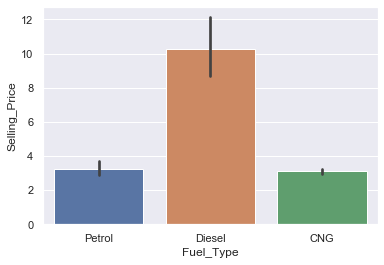

In [31]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=data)

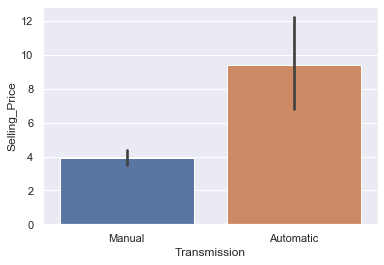

In [17]:
sns.barplot(x='Transmission',y='Selling_Price',data=data)

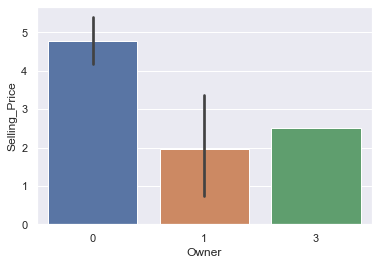

In [33]:
sns.barplot(x='Owner',y='Selling_Price',data=data)

The above plot tells us that 1st hand(0) is costlier than 2nd and 3rd.

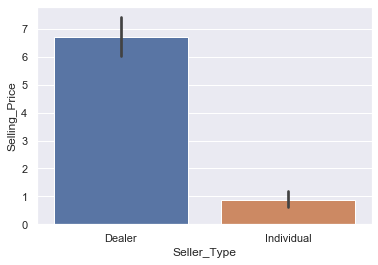

In [34]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=data)

In [18]:
data['Transmission'].replace(to_replace=['Manual','Automatic'],value=[0,1],inplace=True)
data['Seller_Type'].replace(to_replace=['Dealer','Individual'],value=[0,1],inplace=True)
data['Fuel_Type'].replace(to_replace=['Petrol','Diesel','CNG'],value=[0,1,2],inplace=True)

In [78]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,6,3.35,5.59,27000,0,0,0,0
1,3,7,4.75,9.54,43000,1,0,0,0
2,3,3,7.25,9.85,6900,0,0,0,0
3,3,9,2.85,4.15,5200,0,0,0,0
4,3,6,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,1,4,9.50,11.60,33988,1,0,0,0
297,1,5,4.00,5.90,60000,0,0,0,0
298,1,11,3.35,11.00,87934,0,0,0,0
299,1,3,11.50,12.50,9000,1,0,0,0


In [86]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null int64
Seller_Type      301 non-null int64
Transmission     301 non-null int64
Owner            301 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [19]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression ()


In [88]:
data['Car_Name']=data['Car_Name'].astype('float')

In [89]:
x=data.iloc[:,[0,1,3,6]]
y=data.iloc[:,[2]]

# FEACTURE SELECTION

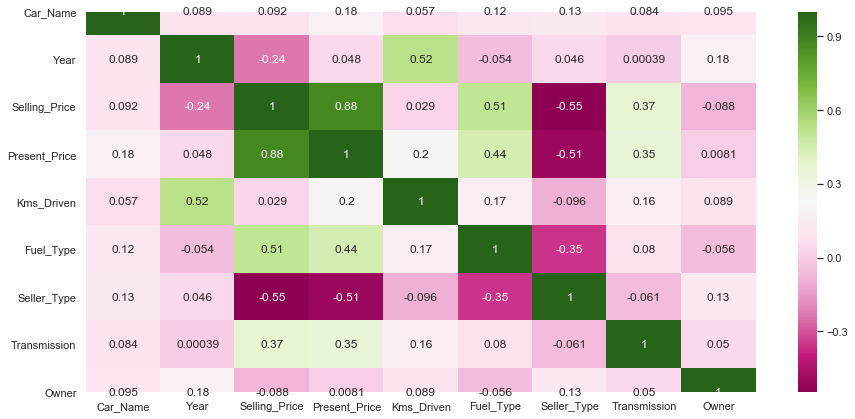

In [97]:
# CORELLATION MATRIEX

fig, ax = plt.subplots(figsize=(15,7))
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True, ax=ax,cmap='PiYG')

# MODEL- LINEAR REGRESSION

In [120]:
from sklearn.model_selection import learning_curve

 IF WE SEE THE CORRILATION MAP W.R.T. THE DEPENDENT VARIABLE (SELLING_PRICE)  WE WILL FIND THAT THE BAST FECTURES ARE    PRESENT_PRICE AND FUEL_TYPE  

In [121]:
# Feacture selection

x=data.iloc[:,[3,5]]
y=data.iloc[:,[2]]

In [204]:
train_size,traning_score,cv_score=learning_curve(LinearRegression(),x ,y,shuffle=False,cv=5,random_state=0,train_sizes= np.linspace(0.1, 1.0, 50),scoring='r2')

In [123]:
train_score1=np.mean(traning_score,axis=1)
train_score1=1-train_score1
test_score1=np.mean(cv_score,axis=1)
test_score1=1-test_score1

# X= 3,5

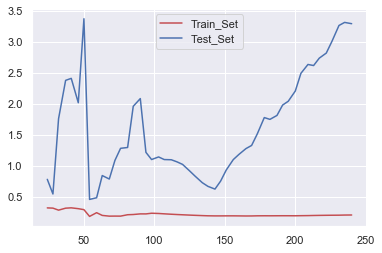

In [124]:
plt.plot(train_size,train_score1,c='r',label='Train_Set')
plt.plot(train_size,test_score1,c='b',label='Test_Set')
plt.legend()

BUT WE CAN SEE THAT THE LEARNING CURVE IS HIGH BIAS- SO WE WILL ADD FEACTURES ACCORDINGLY

# NOTE 


FROM THE DATA ANALYSIS AND HEAT MAP THE FEACTURES WHICH SEEM TO WORK SHOULD BE ,YEAR,PRESENT_PRICE,SCALLERTYPE

In [203]:
# Feacture selection
x=data.iloc[:,[1,3,6]]#data['Fuel_Type']*data['Transmission']
#c=np.array(data['Fuel_Type']*data['Transmission']*data['Car_Name']).reshape((301,1))
#x=np.append(x,c,axis=1)

y=data.iloc[:,[2]]
#x

In [205]:
train_score1=np.mean(traning_score,axis=1)
train_score1=1-train_score1
test_score1=np.mean(cv_score,axis=1)
test_score1=1-test_score1

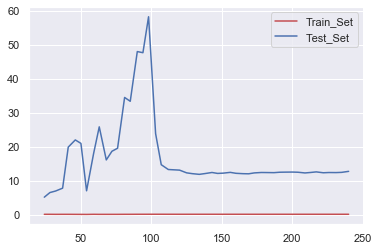

In [206]:
plt.plot(train_size,train_score1,c='r',label='Train_Set')
plt.plot(train_size,test_score1,c='b',label='Test_Set')
plt.legend()

# SELECTED FEACTURES


AS WE CAN SEE THE LEARNIILEARNING  CURVE FOR THE SELCETED FEAFRTURE IS PRALLEL IMPLIES ADD FURTHER DATA IS USLESS 
ALSO THE CURVE IS THE BEST POSSIBLE THIS FEACTURE

# MODEL - POLYNOMIAL REGRESSION

In [207]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Lets Decide the value of D for this Model

In [208]:
from sklearn.model_selection import validation_curve

Lets us find the best vlue for degree

In [236]:
# Feacture selection
x=data.iloc[:,[1,3,6]]#data['Fuel_Type']*data['Transmission']
#c=np.array(data['Fuel_Type']*data['Transmission']*data['Car_Name']).reshape((301,1))
#x=np.append(x,c,axis=1)

y=data.iloc[:,[2]]
#x
polr=PolynomialFeatures(2)
x_polr=polr.fit_transform(x)

In [237]:
train_scores, validation_scores = validation_curve(
                 make_pipeline(PolynomialFeatures(2), LinearRegression()), x, y,
                 param_name='polynomialfeatures__degree',
                 param_range=np.arange(1, 20))

C:\Users\SUDHANSHU\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [238]:
train_scores=np.mean(train_scores,axis=1)
vali_score=np.mean(validation_scores,axis=1)

In [239]:
train_error=1-train_scores
vali_error=1-vali_score
train_size=np.arange(1, 20)

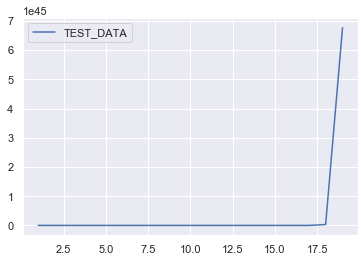

In [240]:
#plt.plot(train_size,train_error,c='r',label='TRAIN_DATA')
plt.plot(train_size,vali_error,c='b',label='TEST_DATA')
plt.legend()

The Curve tells us that incressing d have no positive effects.

In [247]:
train_size,traning_score,cv_score=learning_curve(make_pipeline(PolynomialFeatures(2), LinearRegression()),x,y,shuffle=False,cv=5,random_state=0,train_sizes= np.linspace(0.1, 1.0, 50),scoring='r2')

In [248]:
train_score1=np.mean(traning_score,axis=1)
train_score1=1-train_score1
test_score1=np.mean(cv_score,axis=1)
test_score1=1-test_score1

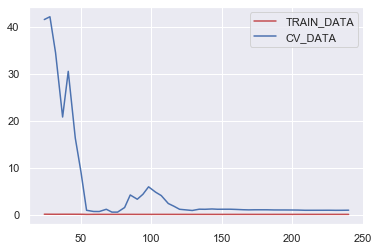

In [249]:
plt.plot(train_size,train_score1,c='r',label='TRAIN_DATA')
plt.plot(train_size,test_score1,c='b',label='CV_DATA')
plt.legend()

The Learning Curve is having perfrct Shape.

# MODEL EVALUATION 

# Logistic_Regression 

In [250]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [251]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
y_pred = lr.predict(X_test)

In [253]:
from sklearn.metrics import r2_score
print('r_2 score:', r2_score(y_test, y_pred))

r_2 score: 0.8682282139657823


# TEST_SCORE= 86.8 %

In [254]:
polr=PolynomialFeatures(2)
x_polr=polr.fit_transform(X_train)

In [255]:
polr.fit(x_polr,y_train)
lr.fit(x_polr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [256]:
y_pred=lr.predict(polr.fit_transform(X_test))
print(y_pred.shape)
print('r2_score:',r2_score(y_pred,y_test) )

(61, 1)
r2_score: 0.9654072552733215


# TEST_SCORE= 96.5 %